In [6]:
%pip install numpy pandas matplotlib torch 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install numpy pandas matplotlib torch 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader

### Investigate the Data.

In [9]:
os.listdir('Dataset_Student/train/video_0/')

['image_15.png',
 'image_14.png',
 'image_16.png',
 'image_17.png',
 'image_13.png',
 'image_12.png',
 'image_10.png',
 'image_11.png',
 'image_8.png',
 'image_9.png',
 'mask.npy',
 'image_2.png',
 'image_3.png',
 'image_1.png',
 'image_0.png',
 'image_4.png',
 'image_5.png',
 'image_7.png',
 'image_6.png',
 'image_20.png',
 'image_21.png',
 'image_19.png',
 'image_18.png']

In [10]:
# video 0.

frames = []
base_dir = 'Dataset_Student/train/video_0/'
image_names = [f'image_{i}.png' for i in range(22)]

for file_name in image_names:
    img = plt.imread(base_dir + file_name)
    frames.append(img)

mask = np.load(base_dir + 'mask.npy')

/var/folders/zn/69d4y15x6rg5trm1s6m6_dn00000gq/T/ipykernel_77758/1234520354.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


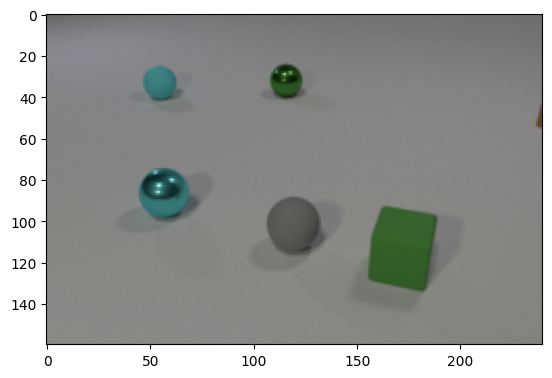

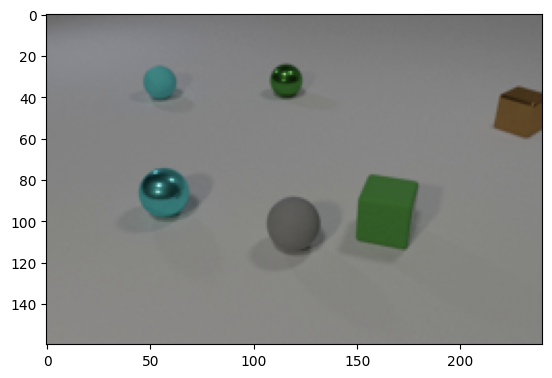

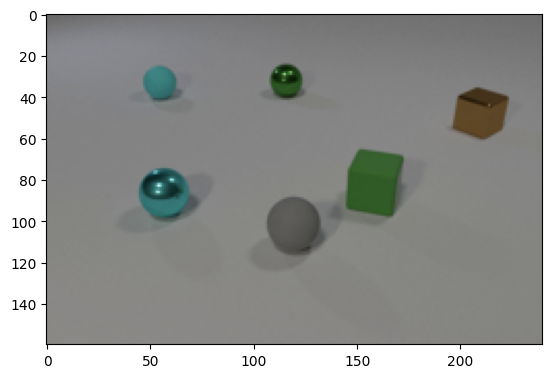

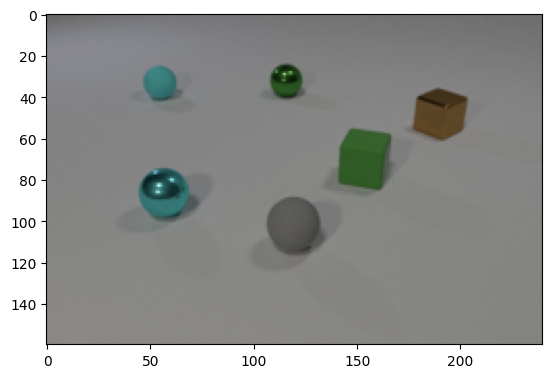

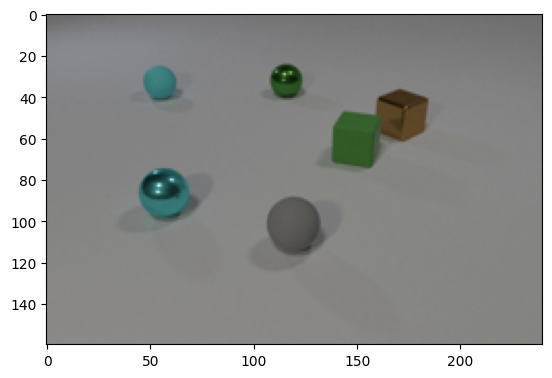

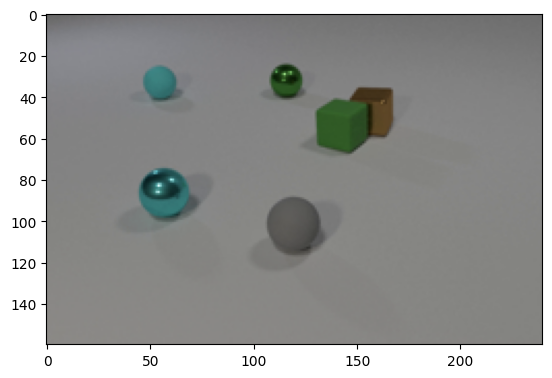

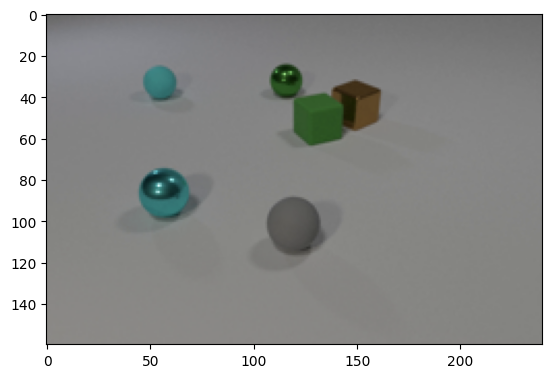

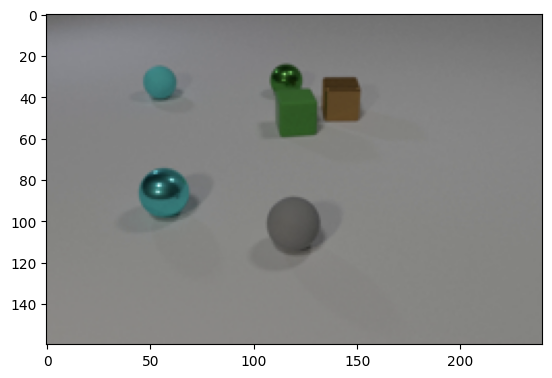

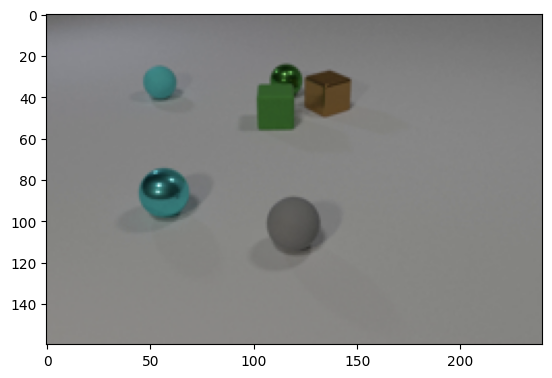

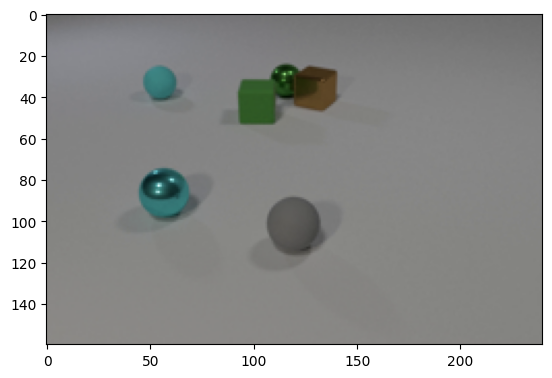

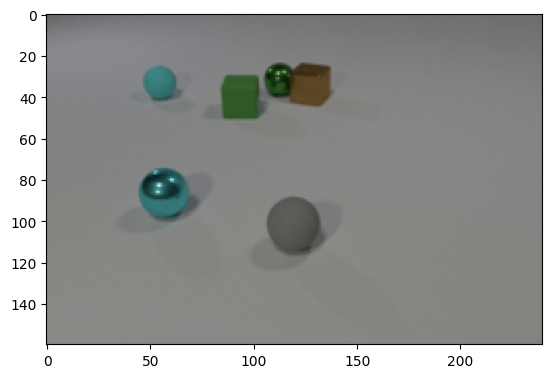

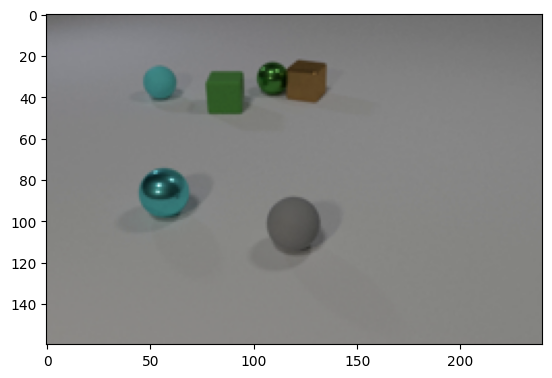

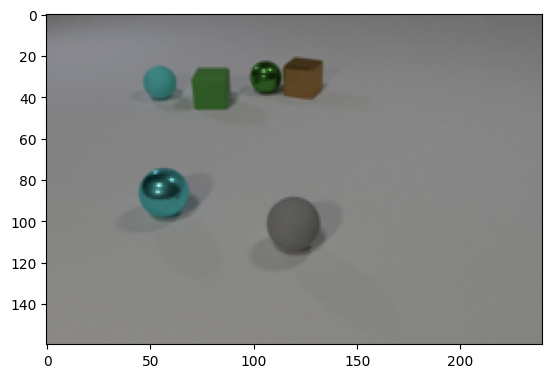

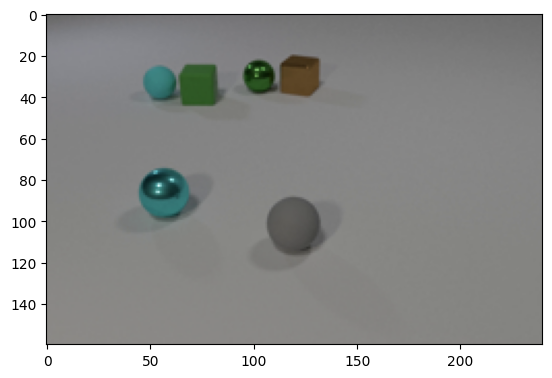

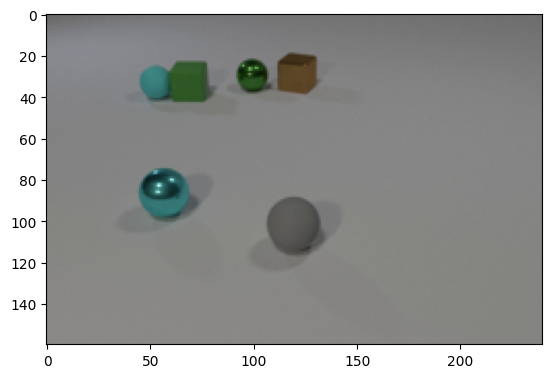

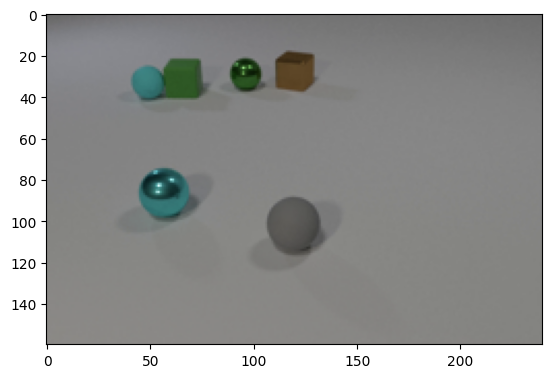

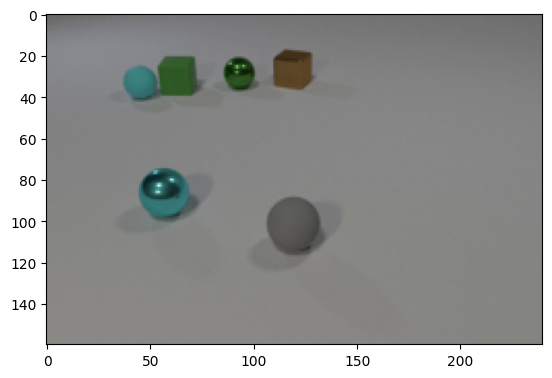

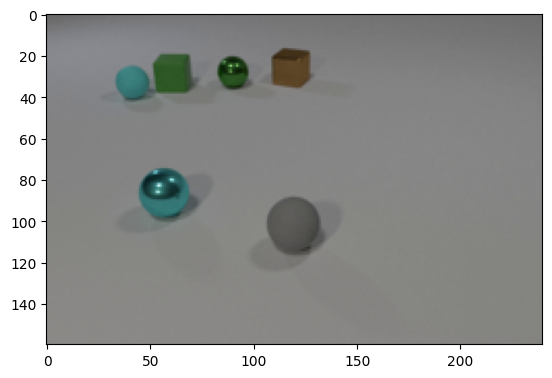

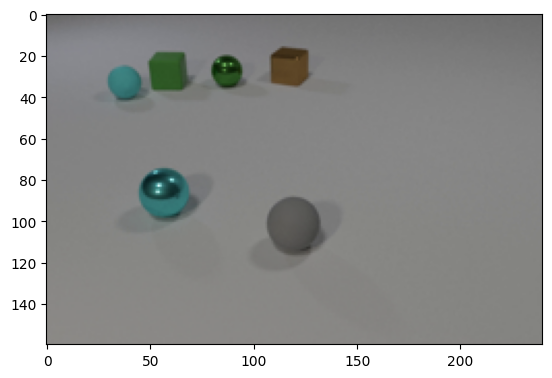

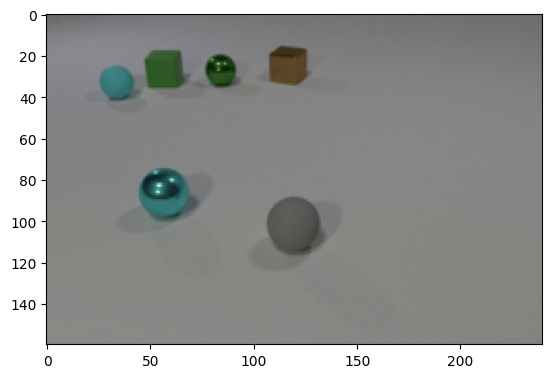

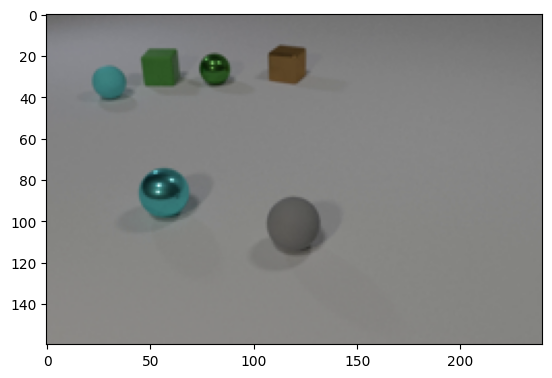

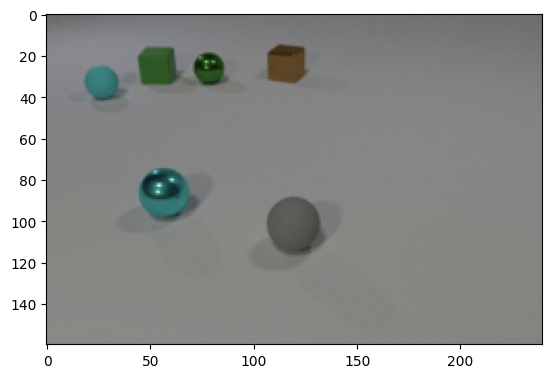

In [11]:
for i in range(22):
    plt.figure()
    plt.imshow(frames[i])

In [12]:
frames[0].shape

(160, 240, 3)

In [13]:
torch.tensor(frames).permute(0,3,1,2).shape

/var/folders/zn/69d4y15x6rg5trm1s6m6_dn00000gq/T/ipykernel_77758/4132543525.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:264.)
  torch.tensor(frames).permute(0,3,1,2).shape


torch.Size([22, 3, 160, 240])

In [30]:
torch.tensor(frames[0:11]).permute(0,3,1,2).shape

torch.Size([11, 3, 160, 240])

### Build the model.
Starting from scratch, based off of Ansh's code.

We want the model to take in torch.Size([11, 3, 160, 240]) (11 frames) and return [3, 160, 240] 1 frame output (the next frame).

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

In [88]:
import torch
import torch.nn as nn

class FramePredictionModel(nn.Module):
    def __init__(self):
        super(FramePredictionModel, self).__init__()

        # Use 4 convolutional layers for feature extraction
        self.conv1 = nn.Conv2d(3*11, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 3, kernel_size=3, padding=1)  # 3 channels for RGB

    def forward(self, x):
        # Feature extraction
        # print('shape: ', x.shape)
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.relu(self.conv3(x))
        predicted_frame = self.conv4(x)  # Output has the same dimension as input
        return predicted_frame

# Instantiate the frame prediction model
model = FramePredictionModel()

# Assuming frames is a list of 22 NumPy arrays each of shape [160, 240, 3]
# Use the first 11 frames
first_11_frames = frames[:11]

# Convert each of the first 11 frames to a PyTorch tensor and concatenate them along the channel dimension
tensor_frames = [torch.tensor(frame).permute(2, 0, 1) for frame in first_11_frames]  # Convert and permute each frame
input_frames = torch.cat(tensor_frames, dim=0)  # The shape becomes [3*11, 160, 240]

# Forward pass to predict the 12th frame
output_frame = model(input_frames.unsqueeze(0))  # Add a batch dimension

# Print the shapes
print("Input shape:", input_frames.shape)
print("Output shape:", output_frame.shape)


Input shape: torch.Size([33, 160, 240])
Output shape: torch.Size([1, 3, 160, 240])


### Going for the FULL OUTLINE OF CODE.

In [43]:
# all 1k videos.

all_sequences = []
for i in range(1000):
    frames = []
    base_dir = f"./Dataset_Student/train/video_{i}/"
    image_names = [f'image_{i}.png' for i in range(22)]
    for file_name in image_names:
        img = plt.imread(base_dir + file_name)
        frames.append(img)
    all_sequences.append(frames)
    mask = np.load(base_dir + 'mask.npy')

In [44]:
# making sure it worked.

print(len(all_sequences))
print(all_sequences[0])
print(type(all_sequences[0]))

1000
[array([[[0.40392157, 0.40392157, 0.4       ],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        [0.40784314, 0.40784314, 0.40784314],
        ...,
        [0.43137255, 0.42745098, 0.43137255],
        [0.42352942, 0.42352942, 0.42352942],
        [0.42745098, 0.42745098, 0.42745098]],

       [[0.4       , 0.4       , 0.39215687],
        [0.4117647 , 0.4117647 , 0.40784314],
        [0.40392157, 0.40392157, 0.40392157],
        ...,
        [0.43529412, 0.43529412, 0.43529412],
        [0.42352942, 0.42352942, 0.42352942],
        [0.43137255, 0.43137255, 0.43137255]],

       [[0.40392157, 0.40392157, 0.40392157],
        [0.41568628, 0.41568628, 0.41568628],
        [0.41960785, 0.41960785, 0.41960785],
        ...,
        [0.43137255, 0.43137255, 0.43137255],
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098]],

       ...,

       [[0.54509807, 0.5372549 , 0.5294118 ],
        [0.54509807, 0.5372549 , 0.5254902 ],
        [0.54509

In [93]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

class FramePredictionDataset(Dataset):
    def __init__(self, all_sequences):
        self.sequences = all_sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        input_frames = sequence[:11] # First 11 frames
        target_frame = sequence[11]  # 12th frame
        return input_frames, target_frame

# Assuming `all_sequences` is a list of sequences, where each sequence is a list of 22 frames
# Each frame should be a tensor of shape [3, 160, 240]
train_dataset = FramePredictionDataset(all_sequences)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)


In [94]:
model = FramePredictionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)


In [95]:
print(len(train_loader))
for i in train_loader:
    input_frames, target_frames = i
    print(input_frames[0].shape)
    print(target_frames.shape)
    break

20
torch.Size([50, 160, 240, 3])
torch.Size([50, 160, 240, 3])


In [91]:
%pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 78 kB 5.0 MB/s eta 0:00:011
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    total_loss = 0
    for input_sequences, target_frames in tqdm(train_loader):
        
        # Concatenate the frames along the channel dimension
        # input_sequences is a list of tensors with shape [batch_size, 3, 160, 240]
        # print(input_sequences[0].shape)
        input_frames = torch.cat([input_sequence.permute(0, 3, 1, 2) for input_sequence in input_sequences], dim=1)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(input_frames)
        loss = criterion(outputs, target_frames.permute(0, 3, 1, 2))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}")


100%|███████████████████████████████████████████| 20/20 [07:39<00:00, 23.00s/it]


Epoch [1/10], Loss: 0.2365


 30%|█████████████▏                              | 6/20 [02:04<04:52, 20.87s/it]

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *